## モーションフィルタ

True

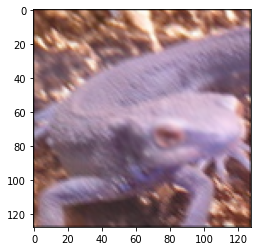

In [2]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

def motion_filter(img, K_size=3):
    if len(img.shape)==3:
        H, W, C = img.shape
    else:
        img = np.expad_dims(img, axis=-1)
        H, W, C = img.shape
        
    # zero padding
    pad = K_size//2
    out = np.zeros((H+pad*2, W+pad*2, C))
    out[pad:pad+H, pad:pad+W] = img.astype(np.uint8)
    
    tmp = out.copy()
    
    # prepare kernel
    K = np.identity(K_size) / K_size
    
    # K = np.diag( [1] * K_size ).astype(np.float)
    # K /= K_size
    
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[y, x, c] = np.sum(K*tmp[y:y+K_size, x:x+K_size, c])
                
    out = out[:H, :W].astype(np.uint8)
    
    return out

img = cv2.imread('../imori.jpg')
out = motion_filter(img, K_size=3)

plt.imshow(out)
cv2.imwrite('out12-1.jpg', out)